<a href="https://colab.research.google.com/github/filipnedeljkov97/Pyhton-projects/blob/main/Projects/Space_Missions/Notebook/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

<center><img src="https://i.imgur.com/YMvu2WZ.jpeg" height=400></center>

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly



In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 29.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta
import calendar
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('all_mission_launches_9Feb2024.csv', index_col = 'Unnamed: 0')
df_data.index.name = None

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(f'Shape of Mission Launches: {df_data.shape}')
print(f'Number of Rows: {df_data.shape[0]}')
print(f'Number of Columns: {df_data.shape[1]}')

Shape of Mission Launches: (6711, 7)
Number of Rows: 6711
Number of Columns: 7


In [ ]:
print(f'Column names: {df_data.columns}')

Column names: Index(['Organisation', 'Location', 'Datetime', 'Details', 'Status', 'Price',
       'Mission_status'],
      dtype='object')


In [ ]:
df_data.head()

,Organisation,Location,Datetime,Details,Status,Price,Mission_status
0,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri Feb 09, 2024 07:03 UTC",Soyuz 2.1v | Cosmos 2575,Active,NaN,Success
1,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA","Thu Feb 08, 2024 06:33 UTC",Falcon 9 Block 5 | PACE,Active,67.00,Success
2,CASC,"Bo Run Jiu Zhou Barge (Area 2), China Coastal ...","Sat Feb 03, 2024 03:06 UTC",Jielong-3 | 9 satellites,Active,NaN,Success
3,CASC,"LC-3, Xichang Satellite Launch Center, China","Fri Feb 02, 2024 23:37 UTC",Long March 2C | Geely Constellation Group 02,Active,30.80,Success
4,Rocket Lab,"Rocket Lab LC-1B, Māhia Peninsula, New Zealand","Wed Jan 31, 2024 06:34 UTC",Electron/Curie | Four Of A Kind,Active,7.50,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
print(f'NaN values: {df_data.isna().values.any()}')
print(f'Duplicates: {df_data.duplicated().values.any()}')

NaN values: True
Duplicates: False


In [ ]:
df_data.isna().any() #We can see thar NaN values are only in 'Price' column

Organisation      False
Location          False
Datetime          False
Details           False
Status            False
Price              True
Mission_status    False
dtype: bool

In [ ]:
df_data.Price.isna().value_counts() #Number of NaN values: 4074

Price
True     4074
False    2637
Name: count, dtype: int64

In [ ]:
df_data.loc[df_data.Price.isnull(), 'Price']

0     NaN
2     NaN
8     NaN
9     NaN
11    NaN
       ..
706   NaN
707   NaN
708   NaN
709   NaN
710   NaN
Name: Price, Length: 4074, dtype: float64

In [ ]:
df_data_clean = df_data.dropna()

In [ ]:
df_data_clean.shape

(2637, 7)

In [ ]:
df_data_clean.isna().values.any()

False

In [ ]:
df_data[df_data.Organisation == 'RVSN USSR'].Price.isnull().value_counts()

Price
True     1819
False     657
Name: count, dtype: int64

In [ ]:
df_data.fillna(0, inplace=True)

As we can see in the USSR, in many cases, we lack data on the rocket launch price.







## Descriptive Statistics

In [ ]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2637 entries, 1 to 341
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    2637 non-null   object 
 1   Location        2637 non-null   object 
 2   Datetime        2637 non-null   object 
 3   Details         2637 non-null   object 
 4   Status          2637 non-null   object 
 5   Price           2637 non-null   float64
 6   Mission_status  2637 non-null   object 
dtypes: float64(1), object(6)
memory usage: 164.8+ KB


In [ ]:
df_data_clean.dtypes

Organisation       object
Location           object
Datetime           object
Details            object
Status             object
Price             float64
Mission_status     object
dtype: object

In [ ]:
df_data_clean.describe()

,Price
count,"2,637.00"
mean,69.16
std,101.44
min,2.50
25%,20.00
50%,30.00
75%,67.00
max,876.00


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
launch_count_by_organization = df_data.Organisation.value_counts()
print(launch_count_by_organization)

Organisation
RVSN USSR           2476
US Air Force         549
CASC                 523
Roscosmos            363
VKS RF               342
                    ... 
OneSpace               1
GK LS                  1
Space Pioneer          1
Relativity Space       1
ABL SS                 1
Name: count, Length: 66, dtype: int64


In [ ]:
launch_count_by_organization = launch_count_by_organization.head(10)

In [ ]:
launch_count_by_organization

Organisation
RVSN USSR           2476
US Air Force         549
CASC                 523
Roscosmos            363
VKS RF               342
SpaceX               318
Arianespace          297
General Dynamics     251
NASA                 222
ULA                  159
Name: count, dtype: int64

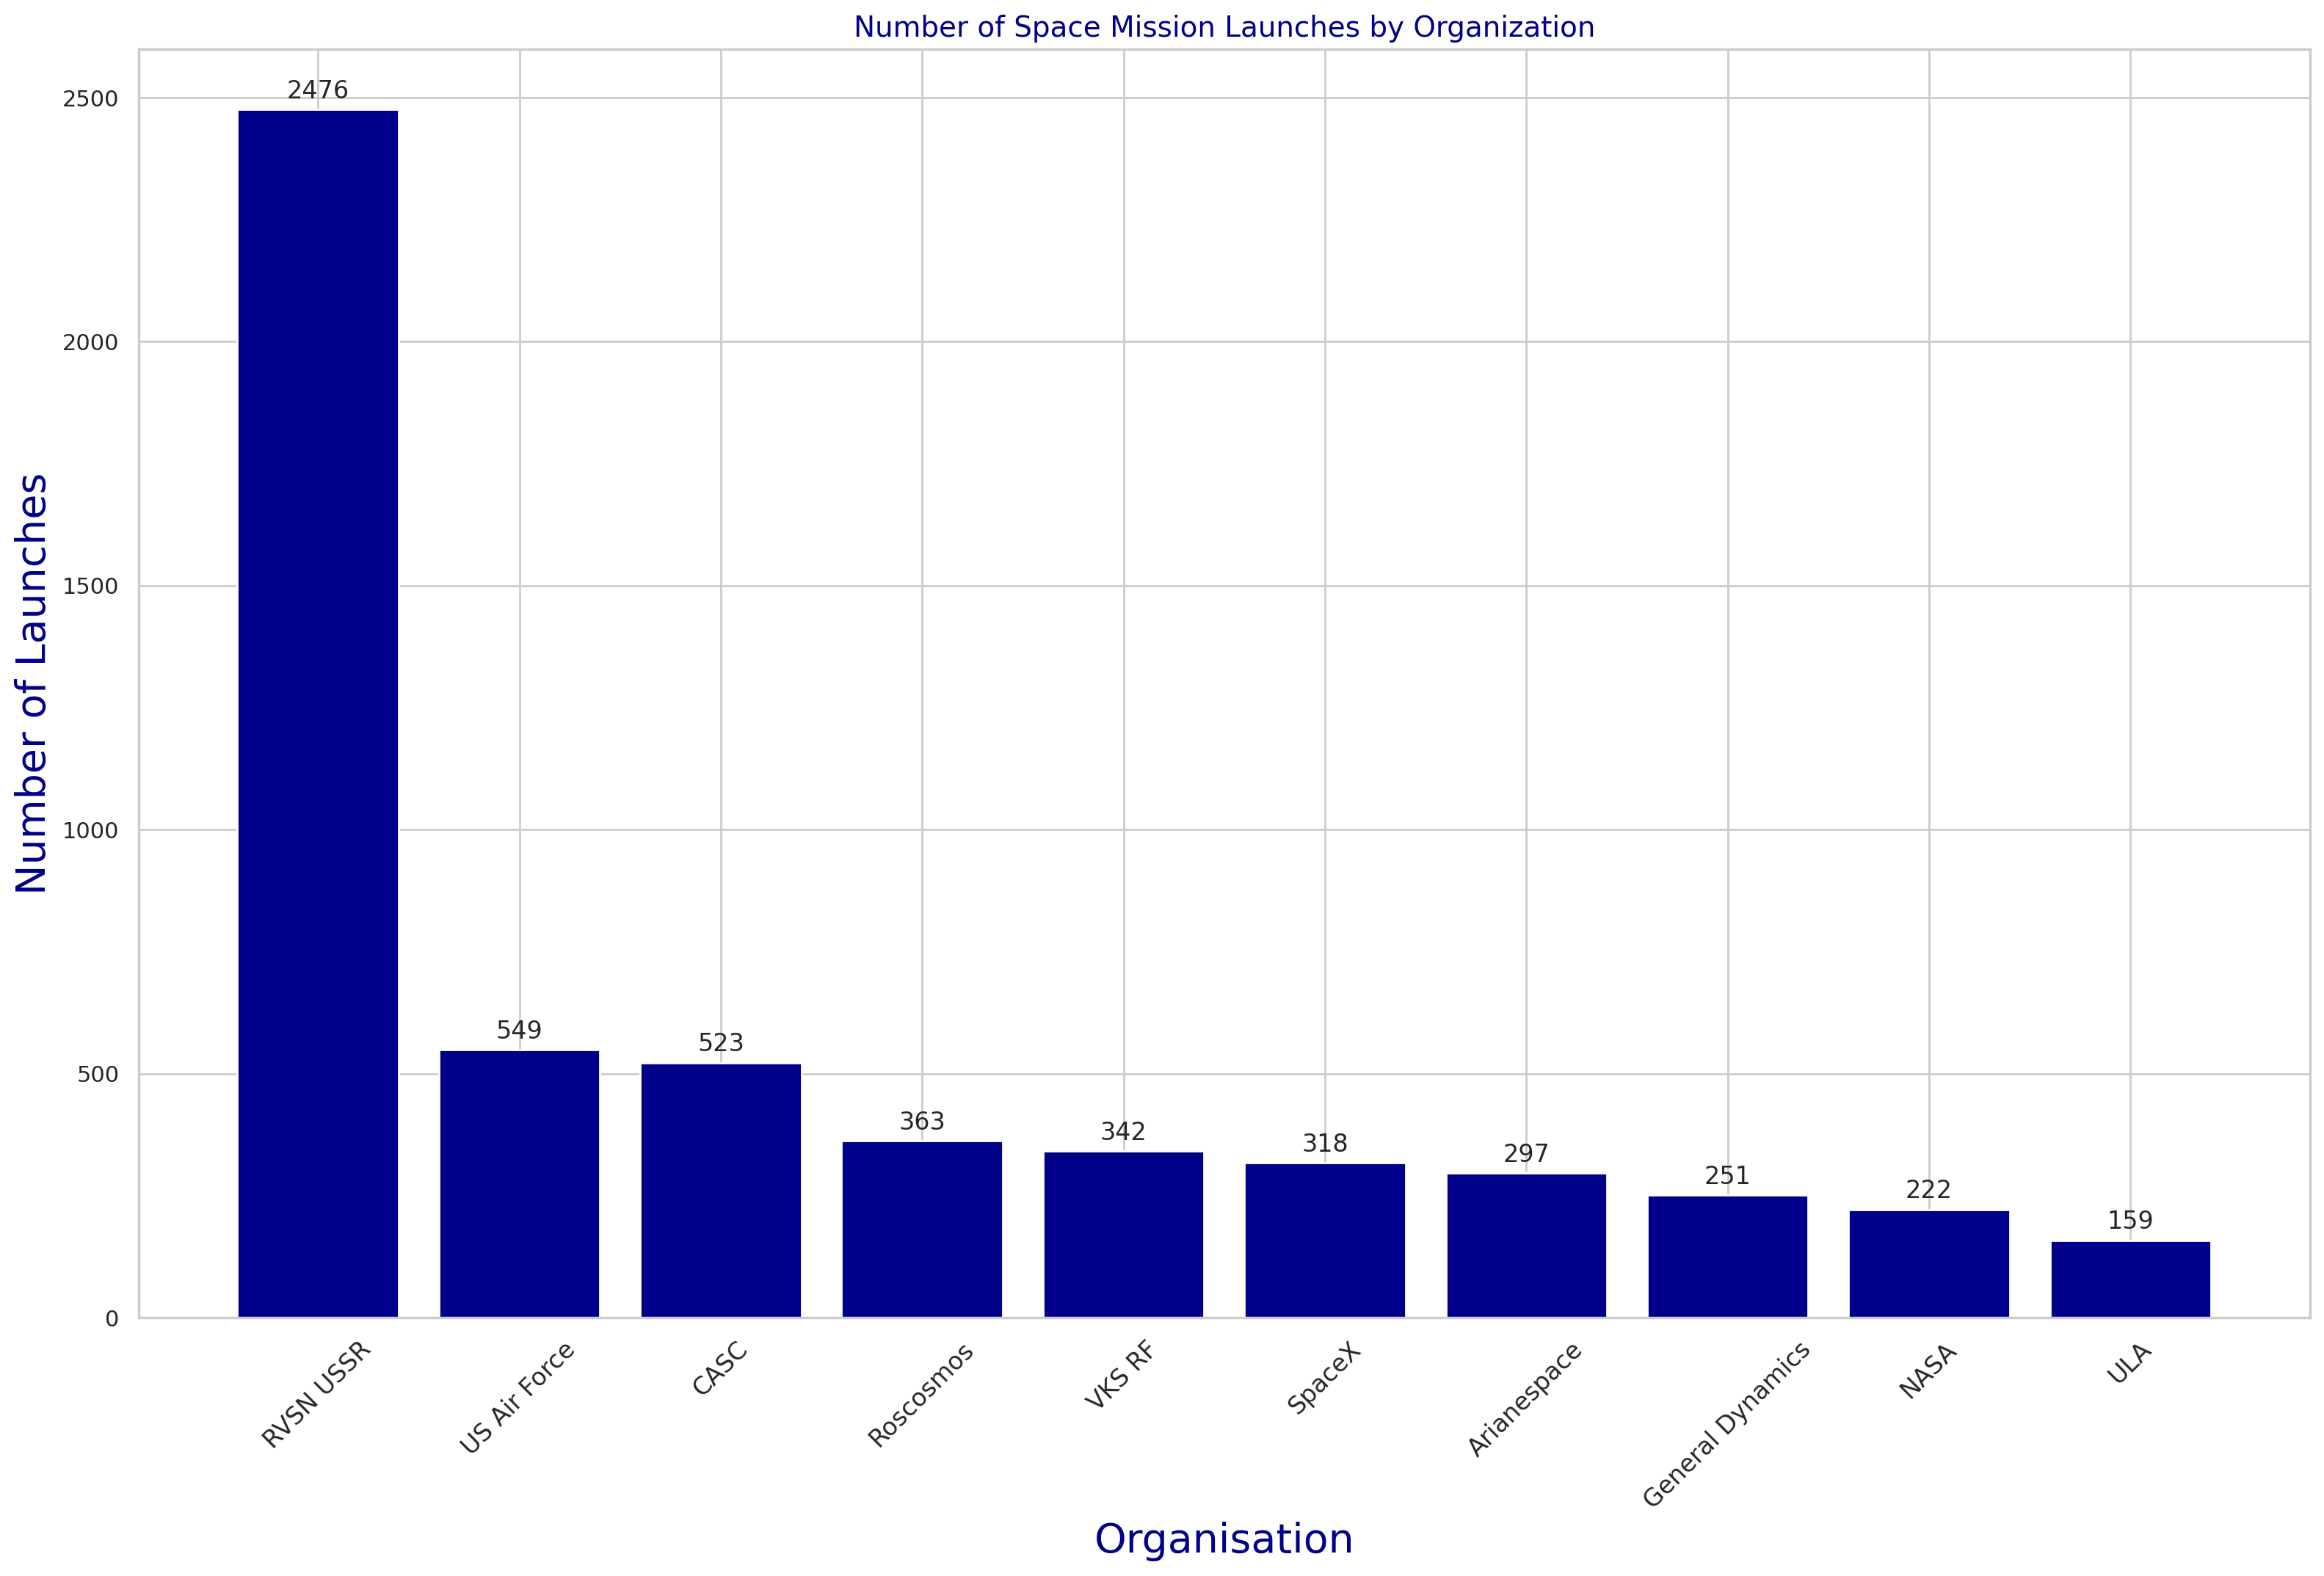

In [ ]:
plt.figure(figsize=(16,10), dpi=200)
plt.title('Number of Space Mission Launches by Organization', fontsize= 14, color = 'darkblue')
plt.xlabel('Organisation', fontsize=20, color = 'darkblue')
plt.ylabel('Number of Launches', fontsize = 20, color='darkblue')
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
bars = plt.bar(launch_count_by_organization.index, launch_count_by_organization.values, color = 'darkblue')
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
status = df_data.Status.value_counts()
print(status)

Status
Retired    5240
Active     1471
Name: count, dtype: int64


In [ ]:
print(f'Number of active rockets: {df_data.Status.value_counts().values[1]}')
print(f'Number of decomissioned rockets: {df_data.Status.value_counts().values[0]}')


Number of active rockets: 1471
Number of decomissioned rockets: 5240


In [ ]:
fig = px.pie(labels=status.index, values = status.values, names = status.index, hole =0.25)
fig.update_traces(textposition = 'inside', textfont_size=15, textinfo='percent')
fig.update_layout(
    title={
        'text': 'Active and Decommissioned Rockets',
        'font': {'size': 20, 'color' : 'darkblue'}
    }
)
fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
missions = df_data.Mission_status.value_counts()
print(missions)

Mission_status
Success              6134
Failure               455
Partial Failure       114
Prelaunch Failure       8
Name: count, dtype: int64


In [ ]:
fig = px.pie(labels=missions.index, values = missions.values, names = missions.index, hole =0.25)
fig.update_traces(textposition='outside', hoverinfo='label+percent', texttemplate='%{label}: %{percent}', outsidetextfont=dict(size=14))

fig.update_layout(
    title={
        'text': 'Missions status',
        'font': {'size': 20,}
    },
    width=800,
    height=600
)
fig.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [ ]:
df_data[df_data['Datetime'].str.contains('UTC')]['Datetime'].head(10)

0    Fri Feb 09, 2024 07:03 UTC
1    Thu Feb 08, 2024 06:33 UTC
2    Sat Feb 03, 2024 03:06 UTC
3    Fri Feb 02, 2024 23:37 UTC
4    Wed Jan 31, 2024 06:34 UTC
5    Tue Jan 30, 2024 17:07 UTC
6    Mon Jan 29, 2024 05:57 UTC
7    Mon Jan 29, 2024 01:10 UTC
8    Sun Jan 28, 2024 00:04 UTC
9    Fri Jan 26, 2024 17:42 UTC
Name: Datetime, dtype: object

In [ ]:
df_data[~df_data['Datetime'].str.contains('UTC')]['Datetime']

228     Sat Mar 04, 2023
76      Sun Jun 26, 2022
297     Mon Feb 01, 2021
467     Thu Aug 29, 2019
586     Thu Jul 26, 2018
602     Tue May 29, 2018
618     Thu Apr 05, 2018
1015    Fri Jan 10, 2014
1052    Thu Sep 05, 2013
1127    Sat Sep 22, 2012
1151    Wed May 23, 2012
455     Thu Jun 09, 2005
560     Fri Aug 22, 2003
1357    Sat May 15, 1993
1488    Fri Dec 20, 1991
8       Mon Sep 30, 1991
96      Tue Nov 20, 1990
370     Wed Jun 22, 1988
433     Sun Dec 20, 1987
467     Thu Aug 27, 1987
614     Wed May 21, 1986
748     Wed Apr 17, 1985
837     Wed Jul 04, 1984
854     Wed Jun 06, 1984
997     Wed May 04, 1983
1057    Sat Oct 30, 1982
1304    Fri Dec 05, 1980
65      Sat Aug 05, 1978
720     Tue Jun 26, 1973
1376    Thu Mar 28, 1968
0       Wed Apr 26, 1967
302     Fri Jan 15, 1965
447     Wed Jun 12, 1963
457     Fri Apr 26, 1963
689     Thu Aug 28, 1958
690     Tue Aug 26, 1958
691     Mon Aug 25, 1958
693     Fri Aug 22, 1958
695     Tue Aug 12, 1958
697     Fri Jul 25, 1958


In [ ]:
date_formats = ['%a %b %d, %Y %H:%M UTC', '%a %b %d, %Y']

copy_datetime = df_data['Datetime']
df_data['Datetime'] = pd.NaT

for format_str in date_formats:
    converted_rows = pd.to_datetime(copy_datetime, format=format_str, errors='coerce')
    df_data.loc[converted_rows.notnull(), 'Datetime'] = converted_rows[converted_rows.notnull()]

print(df_data)

    Organisation                                           Location  \
0         VKS RF             Site 43/4, Plesetsk Cosmodrome, Russia   
1         SpaceX           SLC-40, Cape Canaveral SFS, Florida, USA   
2           CASC  Bo Run Jiu Zhou Barge (Area 2), China Coastal ...   
3           CASC       LC-3, Xichang Satellite Launch Center, China   
4     Rocket Lab     Rocket Lab LC-1B, Māhia Peninsula, New Zealand   
..           ...                                                ...   
706      US Navy           LC-18A, Cape Canaveral SFS, Florida, USA   
707         ABMA           LC-26A, Cape Canaveral SFS, Florida, USA   
708      US Navy           LC-18A, Cape Canaveral SFS, Florida, USA   
709    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
710    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

               Datetime                                       Details  \
0   2024-02-09 07:03:00                      Soyuz 2.1v | Cosmos 2575   
1

In [ ]:
date_formats = ['%a %b %d, %Y %H:%M UTC', '%a %b %d, %Y']

copy_datetime = df_data_clean['Datetime']
df_data_clean['Datetime'] = pd.NaT

for format_str in date_formats:
    converted_rows = pd.to_datetime(copy_datetime, format=format_str, errors='coerce')
    df_data_clean.loc[converted_rows.notnull(), 'Datetime'] = converted_rows[converted_rows.notnull()]



<ipython-input-127-a1618eb7c4d3>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_data_clean.dtypes

Organisation              object
Location                  object
Datetime          datetime64[ns]
Details                   object
Status                    object
Price                    float64
Mission_status            object
dtype: object

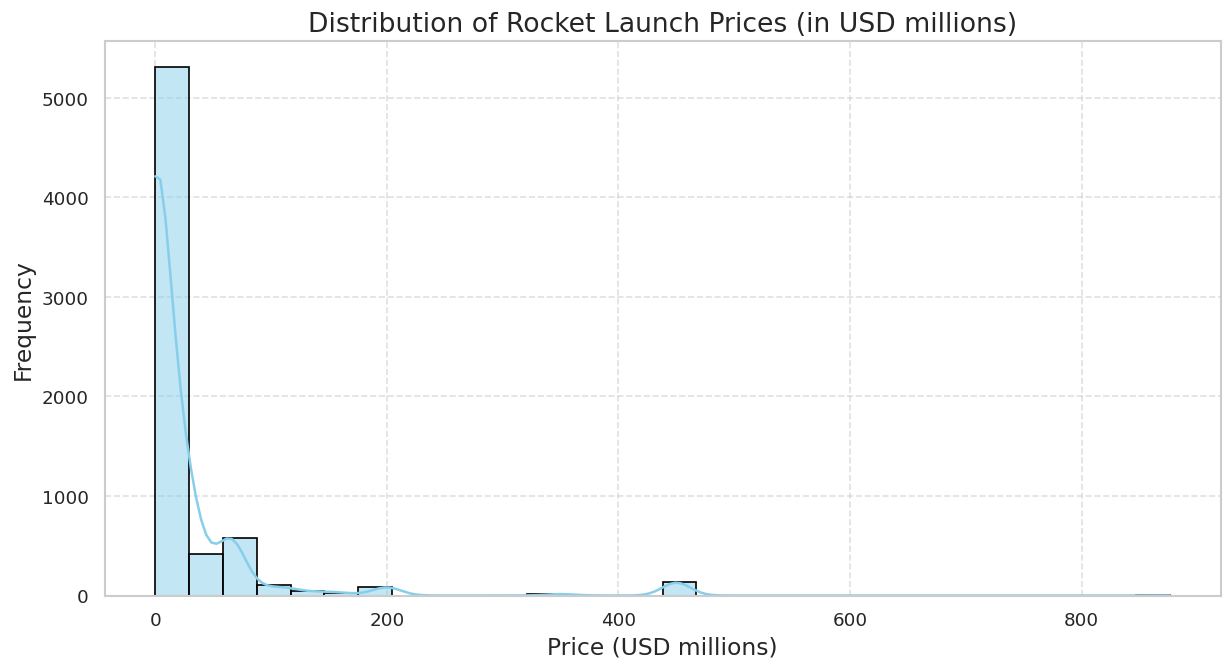

In [ ]:
plt.figure(figsize=(12, 6), dpi=120)

sns.histplot(df_data['Price'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Rocket Launch Prices (in USD millions)', fontsize=16)
plt.xlabel('Price (USD millions)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA



In [ ]:
print(f'{df_data.Location.value_counts()}')
print(f'Sum {df_data.Location.value_counts().sum()}')

Location
Site 1/5, Baikonur Cosmodrome, Kazakhstan       487
Site 31/6, Baikonur Cosmodrome, Kazakhstan      413
Site 43/4, Plesetsk Cosmodrome, Russia          324
Site 41/1, Plesetsk Cosmodrome, Russia          309
Site 43/3, Plesetsk Cosmodrome, Russia          224
                                               ... 
Tai Rui Barge (Area 3), China Coastal Waters      1
Site 250, Baikonur Cosmodrome, Kazakhstan         1
LP-41, Kauai, Pacific Missile Range Facility      1
LC-576A1, Vandenberg SFB, California, USA         1
Tai Rui Barge (Area 2), China Coastal Waters      1
Name: count, Length: 166, dtype: int64
Sum 6711


In [ ]:
df_data.loc[df_data.Location.str.contains('Pacific Missile Range Facility'), 'Location']+=', USA'


In [ ]:
df_data.loc[df_data.Location.str.contains('Gran Canaria'), 'Location']+=', USA'


In [ ]:
df_data.loc[df_data.Location.str.contains('China Coastal Waters'), 'Location']+=', China'


In [ ]:
df_data.loc[df_data.Location.str.contains('Russia'), 'Location']+='n Federation'


In [ ]:
df_data.loc[df_data.Location.str.contains('Barents Sea'), 'Location']+=', Russian Federation'


In [ ]:
df_data.loc[df_data.Location.str.contains('Kiritimati Launch Area'), 'Location']+=', Liberia'

In [ ]:
def get_iso_code(location):
    country_name = location.split(', ')[-1]
    for country in countries:
        if country.name == country_name:
            return country.alpha3
    return None

In [ ]:
df_data['ISO'] = df_data['Location'].apply(get_iso_code)


In [ ]:
df_data.loc[df_data['Location'].str.endswith('USA'), 'ISO'] = 'USA'


In [ ]:
df_data.loc[df_data['Location'].str.endswith('Iran'), 'ISO'] = 'IRN'


In [ ]:
df_data.loc[df_data['Location'].str.endswith('South Korea'), 'ISO'] = 'KOR'
df_data.loc[df_data['Location'].str.endswith('North Korea'), 'ISO'] = 'PRK'


In [ ]:
df_data.loc[df_data.Location.str.contains('Newquay Airport'), 'ISO'] = 'GBR'


In [ ]:
countries_launches = pd.DataFrame(df_data['ISO'].value_counts()).reset_index()
countries_launches.columns = ['ISO', 'Number_of_Launches']

In [ ]:
def get_country_name(alpha3_code):
    try:
        return countries.get(alpha3_code).name
    except KeyError:
        return None

In [ ]:
countries_launches['Country_Name'] = countries_launches['ISO'].apply(get_country_name)

In [ ]:
world_map = px.choropleth(countries_launches,
                          locations='ISO',
                          color='Number_of_Launches',
                          hover_name='Country_Name',
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(
    title=dict(
        text="Number of Space Mission Launches by Country",
        font=dict(
            size=20,
            color="darkblue",
        )
    ),
    coloraxis_showscale=True
)
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
number_of_failures = df_data[df_data.Mission_status != 'Success'][['ISO', 'Mission_status']]

In [ ]:
number_of_failures = number_of_failures.groupby('ISO', as_index=False).agg({'Mission_status':pd.Series.count})

In [ ]:
number_of_failures.columns = ['ISO', 'Mission_failure']

In [ ]:
def get_country_name(alpha3_code):
    try:
        return countries.get(alpha3_code).name
    except KeyError:
        return None
number_of_failures['Country_Name'] = number_of_failures['ISO'].apply(get_country_name)

In [ ]:
world_map = px.choropleth(number_of_failures,
                          locations='ISO',
                          color='Mission_failure',
                          hover_name='Country_Name',
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(
    title=dict(
        text="Number of Space Mission Failures by Country",
        font=dict(
            size=20,
            color="darkblue",
        )
    ),
    coloraxis_showscale=True
)


world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
def get_country_name(alpha3_code):
    try:
        return countries.get(alpha3_code).name
    except KeyError:
        return None
df_data['Country_Name'] = df_data['ISO'].apply(get_country_name)

In [ ]:
country_org_status = df_data[['Country_Name', 'Organisation', 'Mission_status']].copy()
print(country_org_status.head())

               Country_Name Organisation Mission_status
0        Russian Federation       VKS RF        Success
1  United States of America       SpaceX        Success
2                     China         CASC        Success
3                     China         CASC        Success
4               New Zealand   Rocket Lab        Success


In [ ]:
burst = px.sunburst(country_org_status,
                    path=['Country_Name', 'Organisation', 'Mission_status'],
                    title='Mission Status of Coutries and Organisations',
                   )

burst.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='City',
                    coloraxis_showscale=False)

burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
total_amount_organisation = df_data_clean.groupby('Organisation', as_index=False).agg({'Price':pd.Series.sum})

In [ ]:
total_amount_organisation.sort_values('Price', ascending=False, inplace=True)

In [ ]:
total_amount_organisation.columns=['Organisation', 'Total_Amount']

In [ ]:
print('Total Amount of Money Spent by Organisation in milions $\n\n')
print(total_amount_organisation)

Total Amount of Money Spent by Organisation in milions $


        Organisation  Total_Amount
20              NASA     62,076.00
28            SpaceX     20,427.00
1        Arianespace     18,920.00
30               ULA     17,883.00
4               CASC     15,740.78
23         RVSN USSR     14,200.00
26         Roscosmos      6,614.70
13               ILS      5,610.00
21          Northrop      4,520.00
18               MHI      4,032.50
32            VKS RF      3,395.94
14              ISRO      2,613.00
31      US Air Force      1,550.92
3             Boeing      1,241.00
19   Martin Marietta        721.40
29           Starsem        718.00
16         Kosmotras        638.00
25        Rocket Lab        322.50
17          Lockheed        280.00
9             ExPace        190.00
8           Eurockot        169.00
15              JAXA        156.00
33      Virgin Orbit         72.00
10           Firefly         60.00
12   Galactic Energy         48.18
7                ESA         37

# Analyse the Amount of Money Spent by Organisation per Launch




In [ ]:
average_amount =  df_data_clean.groupby('Organisation', as_index=False).agg({'Price':pd.Series.mean, 'Details':pd.Series.count})

In [ ]:
average_amount.sort_values('Price', ascending=False, inplace=True)

In [ ]:
average_amount.columns= ['Organisation', 'Average_Price', 'Number_of_Launches']

In [ ]:
merged_df = pd.merge(total_amount_organisation, average_amount, on='Organisation')

In [ ]:
merged_df.head(10)

,Organisation,Total_Amount,Average_Price,Number_of_Launches
0,NASA,"62,076.00",453.11,137
1,SpaceX,"20,427.00",65.68,311
2,Arianespace,"18,920.00",141.19,134
3,ULA,"17,883.00",155.50,115
4,CASC,"15,740.78",39.55,398
5,RVSN USSR,"14,200.00",21.61,657
6,Roscosmos,"6,614.70",30.34,218
7,ILS,"5,610.00",71.01,79
8,Northrop,"4,520.00",49.67,91
9,MHI,"4,032.50",93.78,43


# Chart the Number of Launches per Year

In [ ]:
df_data['Year'] = df_data.Datetime.dt.year

In [ ]:
launches_per_year = df_data.groupby('Year', as_index=False).agg({'Status': pd.Series.count})

In [ ]:
launches_per_year.columns= ['Year', 'Launches']

In [ ]:
launches_per_year

,Year,Launches
0,1957,3
1,1958,28
2,1959,24
3,1960,41
4,1961,56
...,...,...
63,2020,118
64,2021,157
65,2022,191
66,2023,232


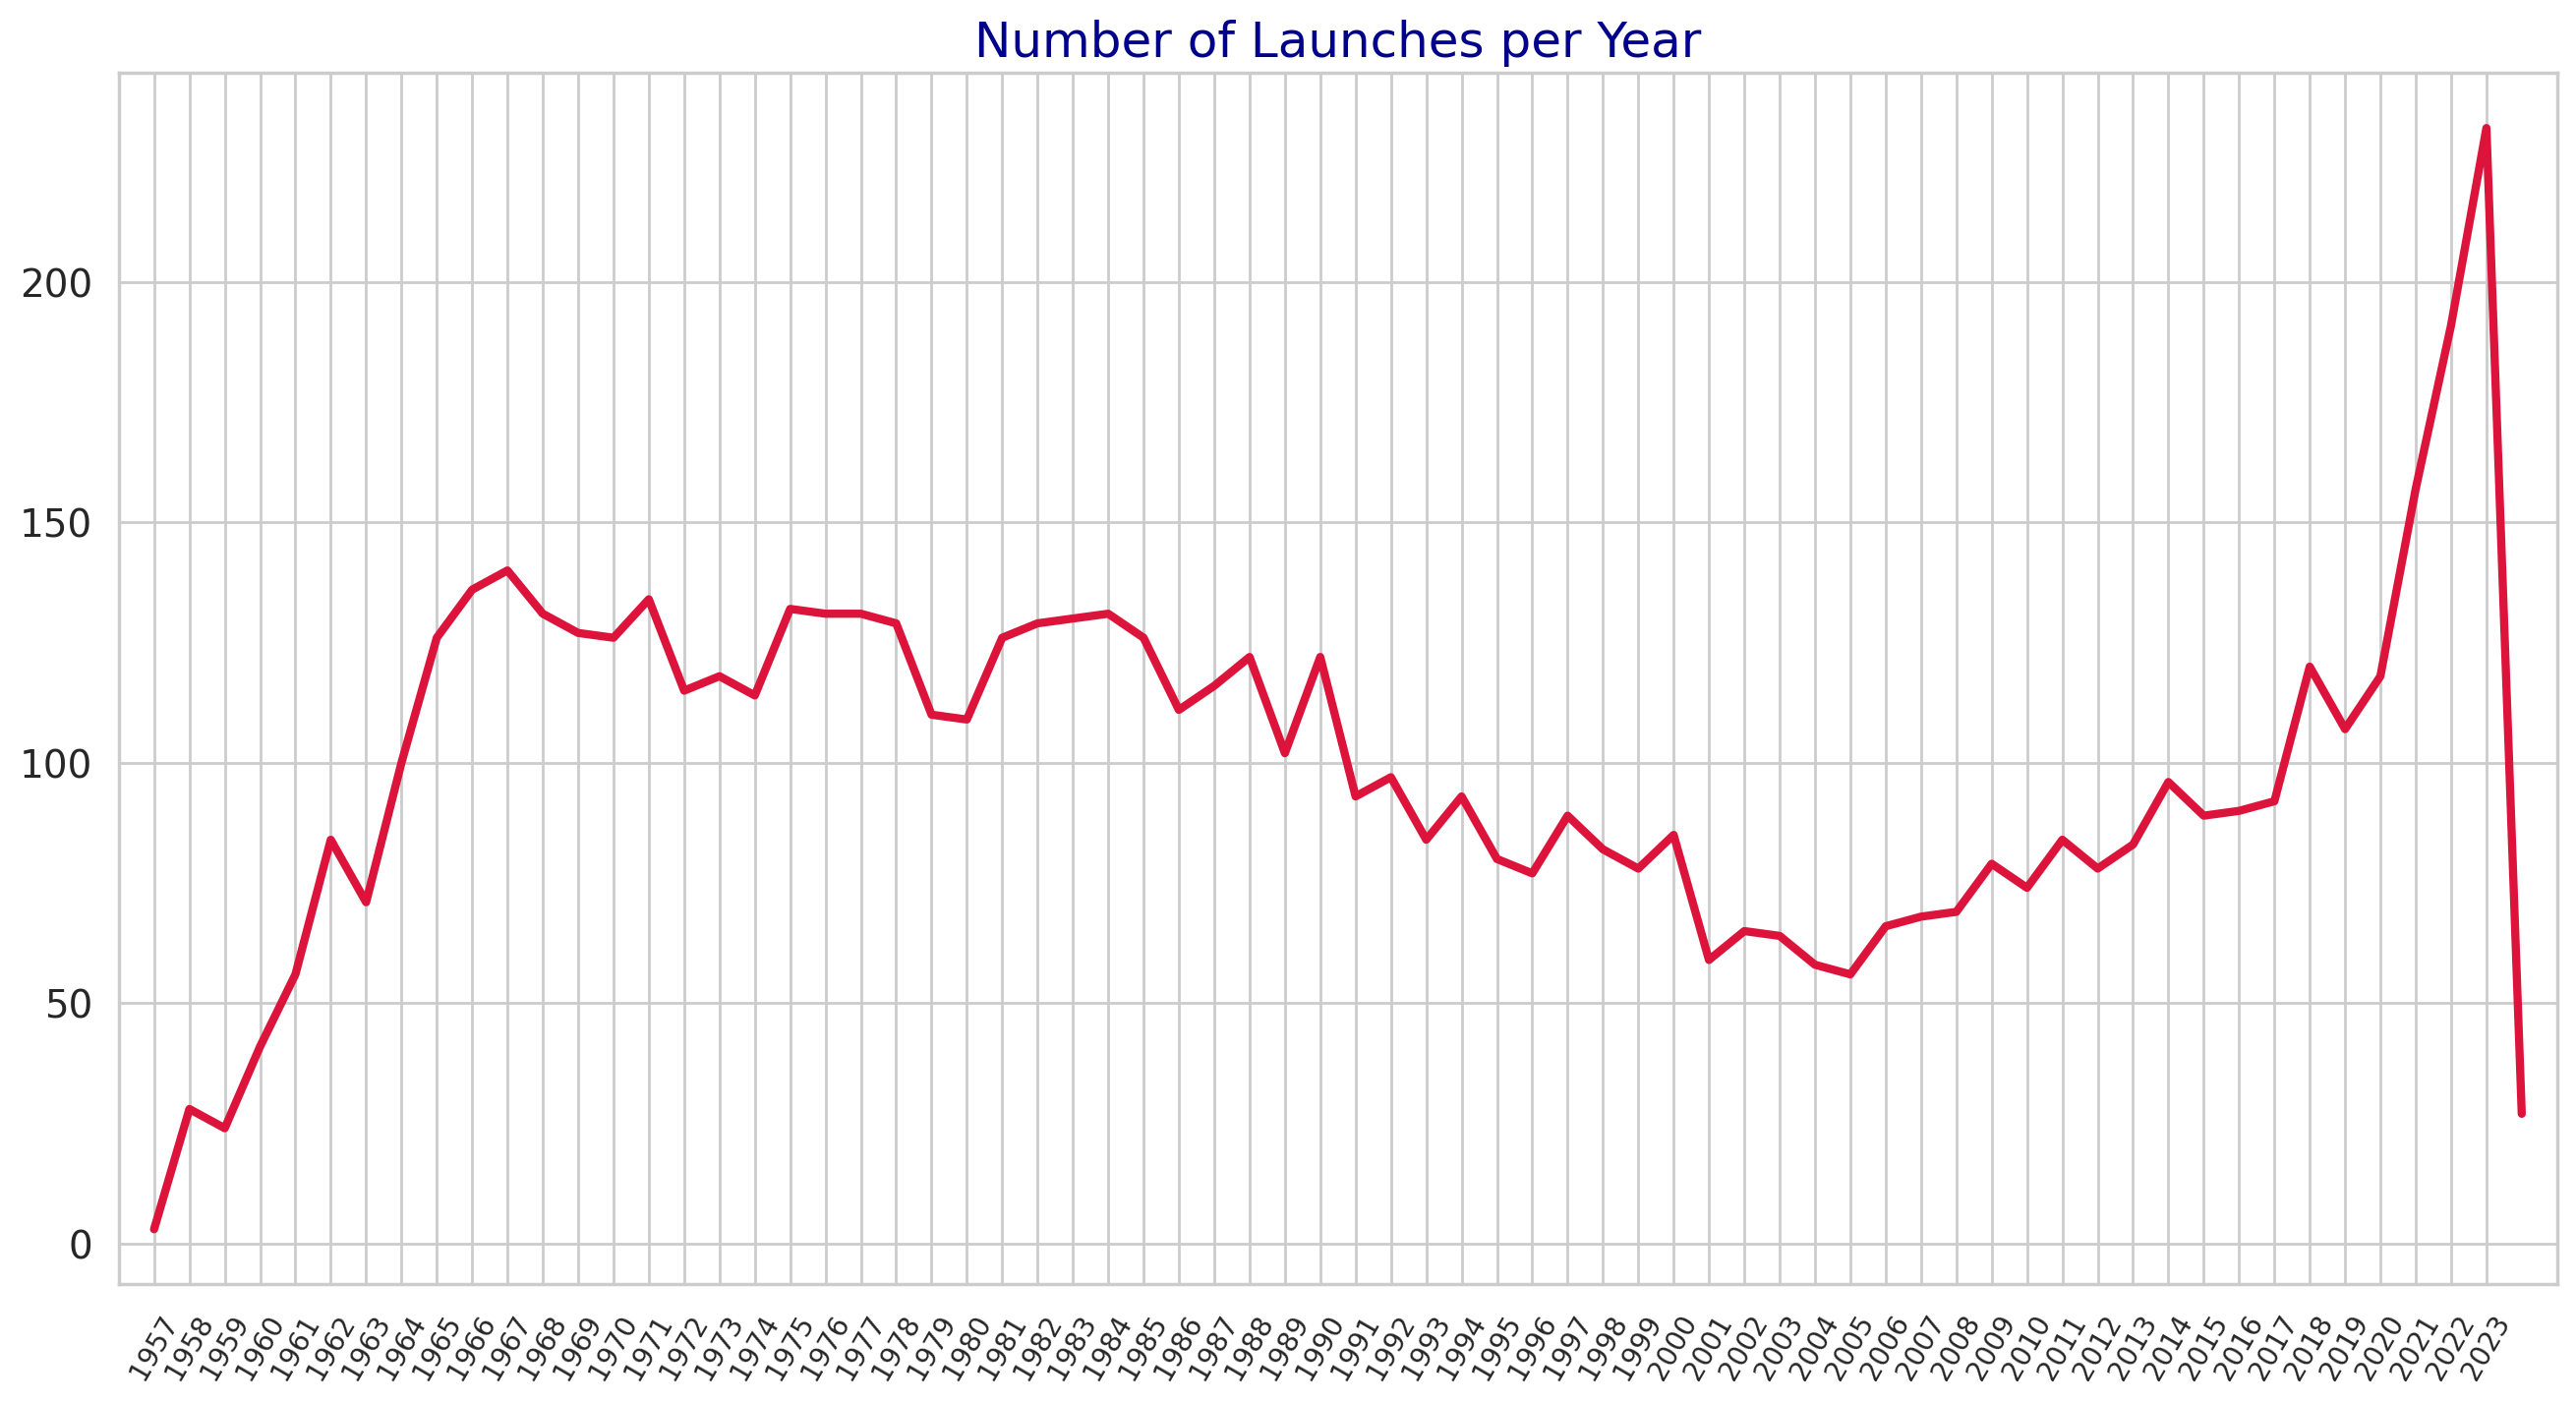

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Launches per Year', fontsize=18, color='darkblue')
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1957, 2024, step=1),
           fontsize=10,
           rotation=60)
ax = plt.gca()
ax.set_xlim(1956, 2025)
ax.plot(launches_per_year.Year, launches_per_year.Launches, c='crimson', linewidth=3)
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
df_data_month = df_data.copy()
df_data_month['Month_Name'] = df_data_month['Datetime'].dt.month_name()


In [ ]:
month_launches = df_data_month.groupby('Month_Name').agg({'Status':pd.Series.count})

In [ ]:
month_launches.head(10)

,Status
Month_Name,
April,571
August,583
December,713
February,491
January,418
July,551
June,599
March,518
May,535


In [ ]:
months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
month_launches = month_launches.loc[months]

In [ ]:
month_launches.reset_index(inplace=True)

In [ ]:
month_launches.columns = ['Month', 'Launches']

In [ ]:
month_launches.set_index('Month', inplace=True)

In [ ]:
moving_average_month = month_launches.rolling(window = 1).mean()

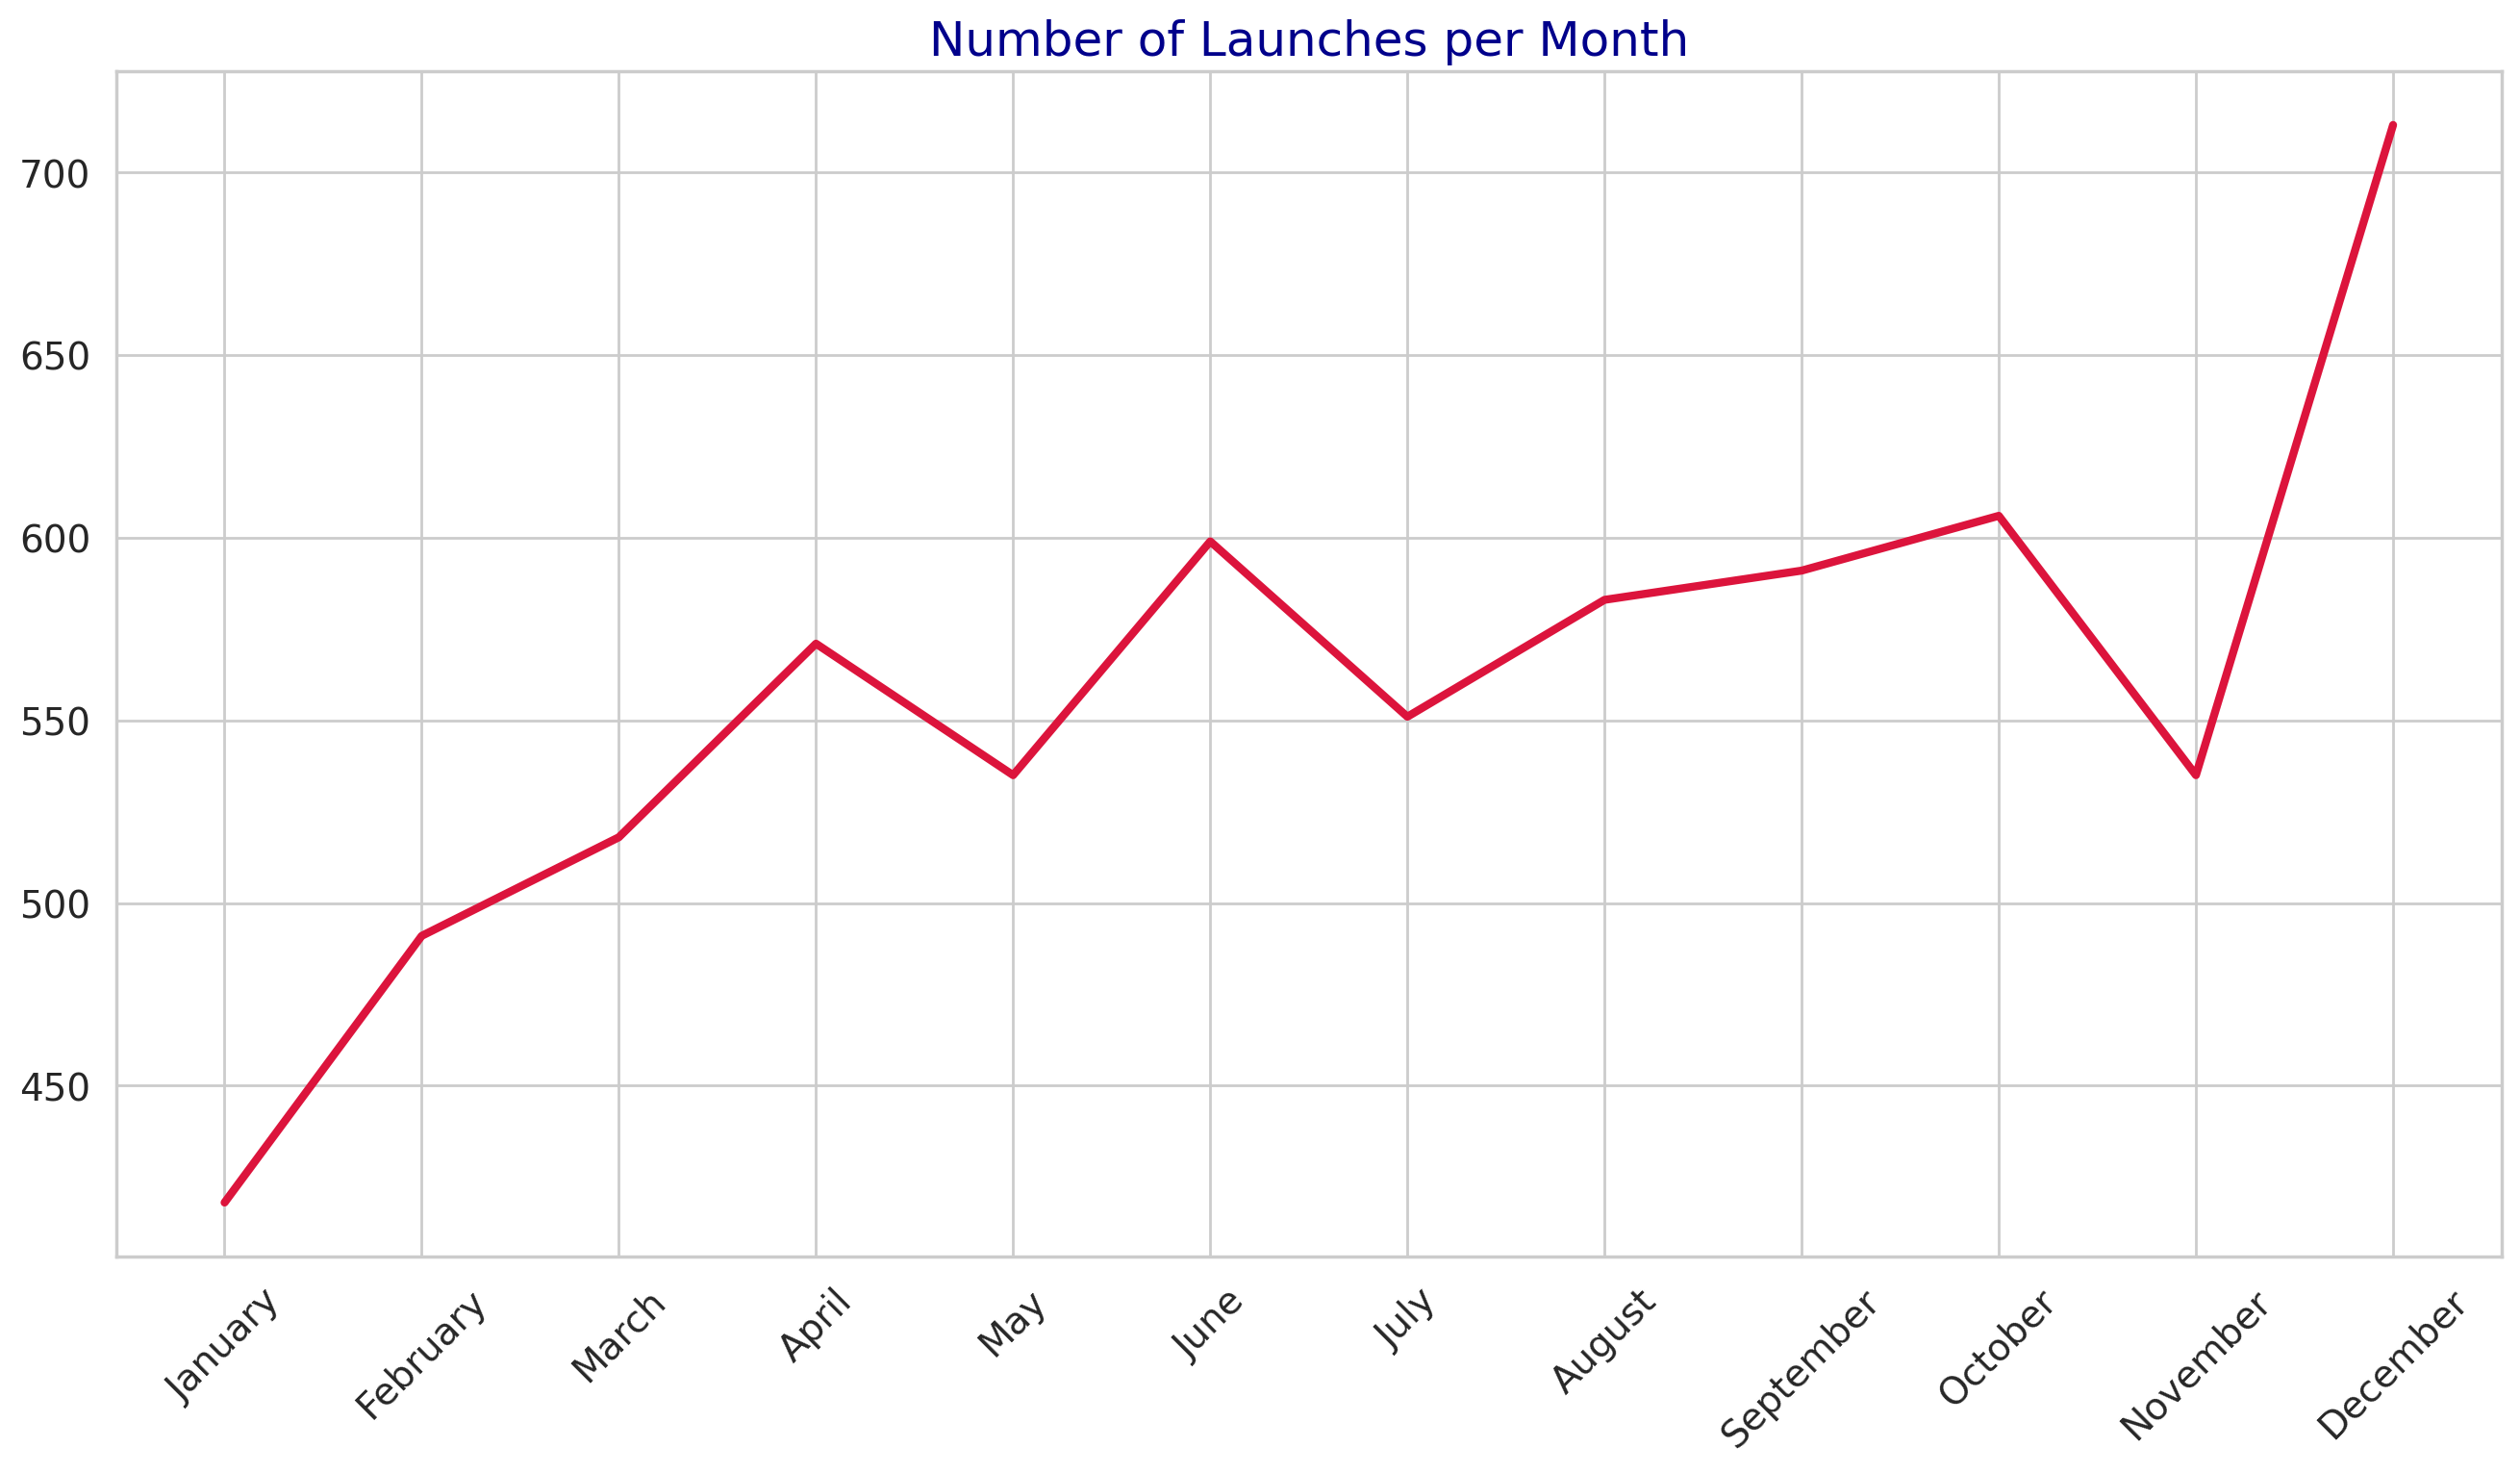

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Launches per Month', fontsize=18, color='darkblue')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14,
           rotation=45)
ax = plt.gca()
ax.plot(month_launches.index, moving_average_month.Launches, c='crimson', linewidth=3)
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
month_launches.reset_index(inplace=True)

In [ ]:
print(f'The Most popular mounth for launches is:\n {month_launches[month_launches.Launches == month_launches.Launches.max()]}')

The Most popular mounth for launches is:
        Month  Launches
11  December       713


In [ ]:
print(f'The least popular mounth for launches is:\n {month_launches[month_launches.Launches == month_launches.Launches.min()]}')

The least popular mounth for launches is:
      Month  Launches
0  January       418


In [ ]:
month_launches.Launches.max()

713

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
average_price_over_time = df_data.dropna()

In [ ]:
average_price_over_time = average_price_over_time.groupby('Year', as_index=False).agg({'Price': pd.Series.sum})

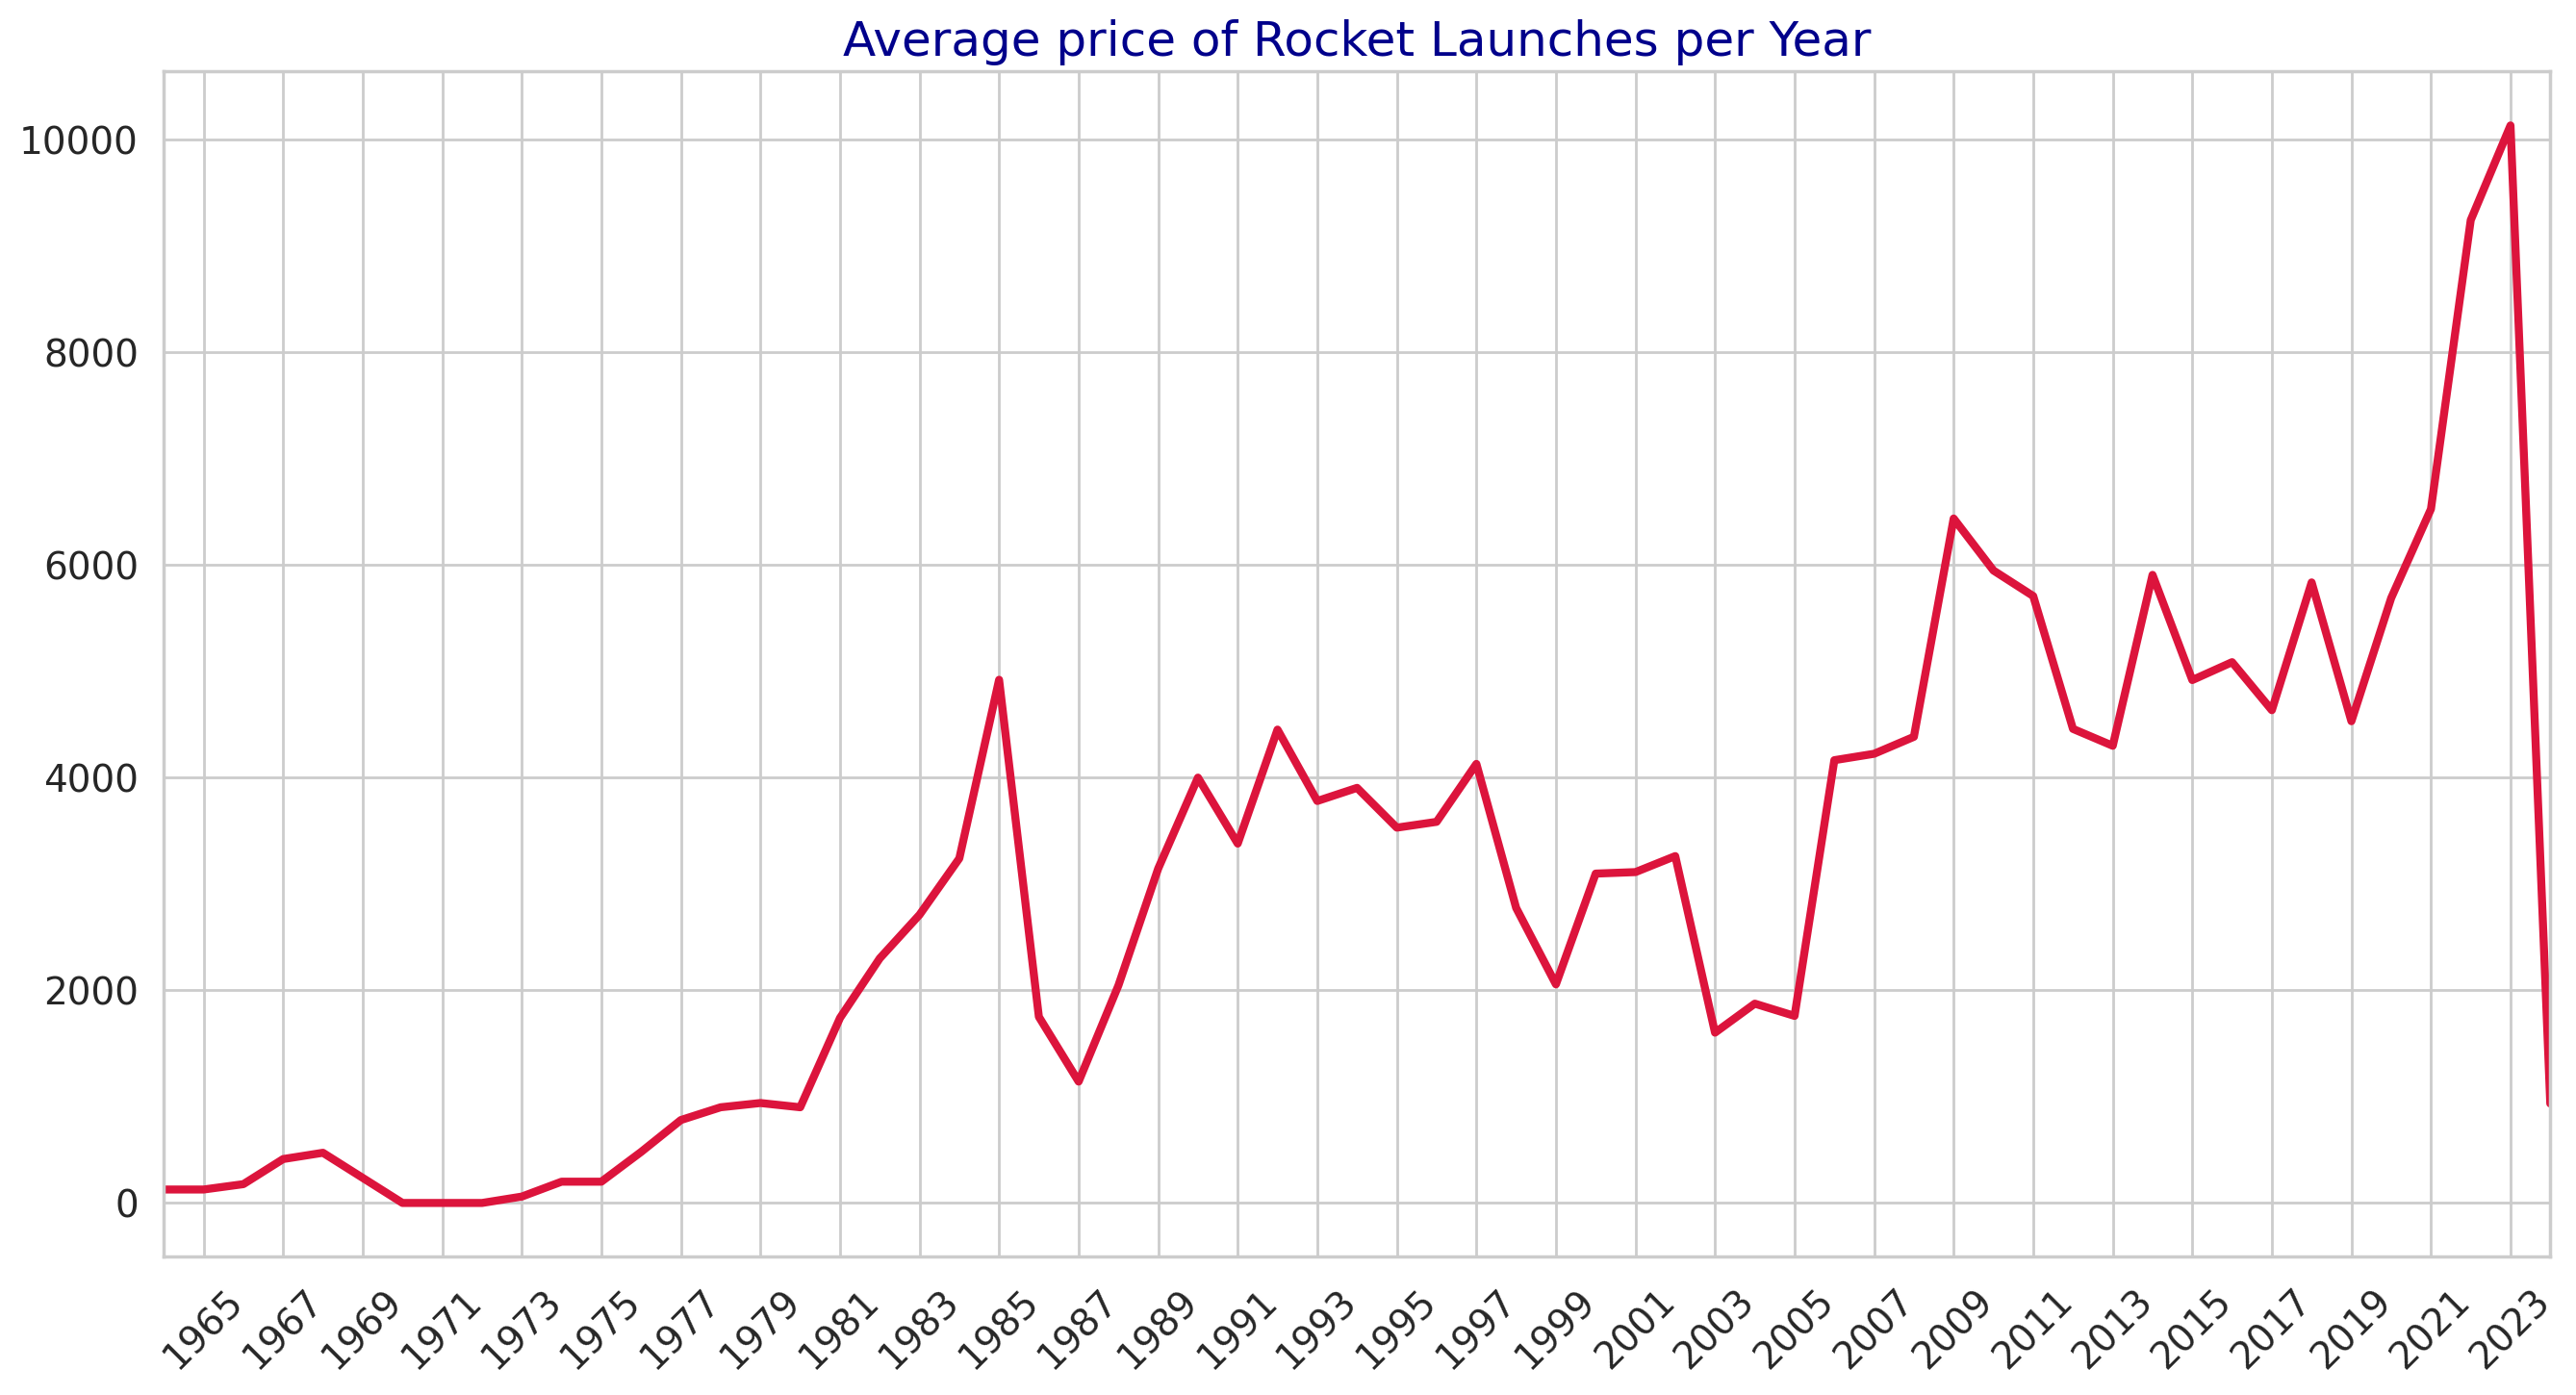

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Average price of Rocket Launches per Year', fontsize=18, color='darkblue')
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1957, 2024, step=2),
           fontsize=14,
           rotation=45)
ax = plt.gca()
ax.set_xlim(1964, 2024)
ax.plot(average_price_over_time.Year, average_price_over_time.Price, c='crimson', linewidth=3)
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
organisations = df_data.groupby(['Organisation', 'Year']).agg({'Status':pd.Series.count})
organisations = organisations.groupby(['Organisation', 'Year']).sum().groupby(level=[0]).cumsum()
organisations.reset_index(inplace=True)
organisations.columns = ['Organisation', 'Year', 'Launches_Over_Year']
organisations.sort_values('Year', ascending=True, inplace=True)


In [ ]:
top_10 = df_data.groupby('Organisation', as_index=False).agg({'Status':pd.Series.count})

In [ ]:
top_10.columns = ['Organisation', 'Launches']
top_10.sort_values('Launches', ascending=False, inplace=True)
top_10=top_10.head(10)

In [ ]:
top_10_organisations = pd.merge(organisations, top_10, on='Organisation')

In [ ]:
top_10_organisations

,Organisation,Year,Launches_Over_Year,Launches
0,RVSN USSR,1957,2,2476
1,RVSN USSR,1958,7,2476
2,RVSN USSR,1959,11,2476
3,RVSN USSR,1960,20,2476
4,RVSN USSR,1961,29,2476
...,...,...,...,...
347,ULA,2020,142,159
348,ULA,2021,147,159
349,ULA,2022,155,159
350,ULA,2023,158,159


In [ ]:
plt.figure(figsize=(16, 10))
line = px.line(top_10_organisations,
               x='Year',
               y='Launches_Over_Year',
               color='Organisation',
               title='Total Yearly Launches by Country')

line.show()

<Figure size 1600x1000 with 0 Axes>

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
cold_war_data = df_data.loc[df_data.Year <=1991]

In [ ]:
cold_war_data_filtered = cold_war_data[cold_war_data['ISO'].isin(['KAZ', 'USA', 'RUS'])]


In [ ]:
cold_war_data_filtered.loc[cold_war_data_filtered['ISO'].isin(['KAZ', 'RUS']), 'Country_Name'] = 'USSR'


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
launches_cold_war = cold_war_data_filtered.groupby('Country_Name').agg({'Status':pd.Series.count})
launches_cold_war.columns = ['Launches']

In [ ]:
launches_cold_war

,Launches
Country_Name,
USSR,2478
United States of America,1075


In [ ]:
fig = px.pie(labels=launches_cold_war.index, values = launches_cold_war.Launches, names = launches_cold_war.index, hole =0.25)
fig.update_traces(textposition = 'inside', textfont_size=15, textinfo='percent')
fig.update_layout(
    title={
        'text': 'USA vs USSR Number of Launches',
        'font': {'size': 20, 'color' : 'darkblue'}
    }
)
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
cold_war_launches = cold_war_data_filtered.groupby(['Country_Name', 'Year']).agg({'Status':pd.Series.count})
cold_war_launches.columns = ['Launches']
cold_war_launches


Launches
Country_Name             Year          
USSR                     1957         2
                         1958         5
                         1959         4
                         1960         9
                         1961         9
...                                 ...
United States of America 1987         9
                         1988        11
                         1989        18
                         1990        27
                         1991        19

[70 rows x 1 columns]

In [ ]:
cold_war_launches = cold_war_launches.groupby(['Country_Name', 'Year']).sum().groupby(level=[0]).cumsum()
cold_war_launches.reset_index(inplace=True)

In [ ]:
line = px.line(cold_war_launches,
               x='Year',
               y='Launches',
               color='Country_Name',
               title='Total Yearly Launches by Country')

line.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
mission_failures = cold_war_data_filtered.groupby(['Country_Name', 'Year', 'Mission_status'], as_index=False).agg({'Status':pd.Series.count})
mission_failures = mission_failures.loc[mission_failures.Mission_status == 'Failure']
mission_failures.columns = ['Country_Name', 'Year', 'Mission_status','Failure_Launches']
mission_failures['Cumulative_Launches'] =mission_failures.groupby('Country_Name')['Failure_Launches'].cumsum()


In [ ]:
mission_failures.sort_values('Year', ascending=True).head(10)

,Country_Name,Year,Mission_status,Failure_Launches,Cumulative_Launches
92,United States of America,1957,Failure,1,1
93,United States of America,1958,Failure,16,17
1,USSR,1958,Failure,4,4
3,USSR,1959,Failure,1,5
96,United States of America,1959,Failure,10,27
99,United States of America,1960,Failure,15,42
6,USSR,1960,Failure,6,11
101,United States of America,1961,Failure,15,57
8,USSR,1961,Failure,4,15
10,USSR,1962,Failure,7,22


In [ ]:
mission_failures.sort_values('Year', ascending=True).head(30)

,Country_Name,Year,Mission_status,Failure_Launches,Cumulative_Launches
92,United States of America,1957,Failure,1,1
93,United States of America,1958,Failure,16,17
1,USSR,1958,Failure,4,4
3,USSR,1959,Failure,1,5
96,United States of America,1959,Failure,10,27
99,United States of America,1960,Failure,15,42
6,USSR,1960,Failure,6,11
101,United States of America,1961,Failure,15,57
8,USSR,1961,Failure,4,15
10,USSR,1962,Failure,7,22


In [ ]:
line = px.line(mission_failures,
               x='Year',
               y='Cumulative_Launches',
               color='Country_Name',
               title='Total Yearly Failure Launches by Country',
               hover_data={'Year': True, 'Cumulative_Launches': True, 'Country_Name': True, 'Failure_Launches': True}
               )


line.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:
mission_failures = cold_war_data_filtered.groupby(['Country_Name', 'Year', 'Mission_status'], as_index=False).agg({'Status':pd.Series.count})
mission_failures = mission_failures.loc[mission_failures.Mission_status == 'Failure']
mission_failures.columns = ['Country_Name', 'Year', 'Mission_status','Failure_Launches']
mission_failures.drop('Mission_status', axis=1, inplace=True)
#mission_failures['Cumulative_Launches'] =mission_failures.groupby('Country_Name')['Failure_Launches'].cumsum()

In [ ]:
percentage = cold_war_data_filtered.groupby(['Country_Name', 'Year'], as_index=False).agg({'Status':pd.Series.count})
percentage.columns =['Country_Name','Year','Total_Launches']
percentage

,Country_Name,Year,Total_Launches
0,USSR,1957,2
1,USSR,1958,5
2,USSR,1959,4
3,USSR,1960,9
4,USSR,1961,9
...,...,...,...
65,United States of America,1987,9
66,United States of America,1988,11
67,United States of America,1989,18
68,United States of America,1990,27


In [ ]:
percentage.sort_values('Year', ascending=True, inplace= True)

In [ ]:
nedostajuce_godine_drzave = pd.merge(percentage, mission_failures, on = ['Country_Name', 'Year'], how = 'outer')
nedostajuce_godine_drzave.Failure_Launches.fillna(0, inplace=True)

In [ ]:
nedostajuce_godine_drzave.sort_values('Year', ascending=True)[nedostajuce_godine_drzave.Failure_Launches==0]

<ipython-input-293-4961cd2a29d6>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Country_Name,Year,Total_Launches,Failure_Launches
0,USSR,1957,2,0.00
44,United States of America,1979,16,0.00
47,USSR,1980,90,0.00
50,United States of America,1982,18,0.00
52,United States of America,1983,22,0.00
55,USSR,1984,99,0.00
62,United States of America,1988,11,0.00
64,United States of America,1989,18,0.00


In [ ]:
percent = nedostajuce_godine_drzave['Failure_Launches']/nedostajuce_godine_drzave['Total_Launches']*100
nedostajuce_godine_drzave['Percent_of_Failures'] = percent

In [ ]:
nedostajuce_godine_drzave

,Country_Name,Year,Total_Launches,Failure_Launches,Percent_of_Failures
0,USSR,1957,2,0.00,0.00
1,United States of America,1957,1,1.00,100.00
2,USSR,1958,5,4.00,80.00
3,United States of America,1958,23,16.00,69.57
4,USSR,1959,4,1.00,25.00
...,...,...,...,...,...
65,USSR,1989,75,1.00,1.33
66,United States of America,1990,27,1.00,3.70
67,USSR,1990,80,4.00,5.00
68,USSR,1991,62,2.00,3.23


In [ ]:
line = px.line(nedostajuce_godine_drzave,
               x='Year',
               y='Percent_of_Failures',
               color='Country_Name',
               title='Total Percentage of Failures Over Time',
               hover_data={'Year': True, 'Total_Launches': True, 'Country_Name': True, 'Failure_Launches': True, 'Percent_of_Failures':True}
               )


line.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2024)

Do the results change if we only look at the number of successful launches?

In [ ]:
country_number_of_launches = df_data.groupby(['Country_Name', 'Year'], as_index=False).agg({'Status':pd.Series.count})
country_number_of_launches['Amount_Over_Years'] = country_number_of_launches.groupby('Country_Name')['Status'].cumsum()
country_number_of_launches.columns = ['Country_Name', 'Year', 'Launches', 'Amount_Over_Years']

In [ ]:
line = px.line(country_number_of_launches,
               x='Year',
               y='Launches',
               color='Country_Name',
               title='Total Number of Launches Over time',
               hover_data={'Year': True, 'Launches': True, 'Country_Name': True, 'Amount_Over_Years': True}
               )


line.show()

In [ ]:
country_number_of_launches_success = df_data.groupby(['Country_Name', 'Year', 'Mission_status'], as_index=False).agg({'Status':pd.Series.count})
country_number_of_launches_success = country_number_of_launches_success.loc[country_number_of_launches_success.Mission_status == 'Success']
country_number_of_launches_success['Amount_Over_Years'] = country_number_of_launches_success.groupby('Country_Name')['Status'].cumsum()
country_number_of_launches_success.columns = ['Country_Name', 'Year', 'Mission_status','Launches', 'Amount_Over_Years']

In [ ]:
line = px.line(country_number_of_launches_success,
               x='Year',
               y='Launches',
               color='Country_Name',
               title='Total Number of Success Launches Over time',
               hover_data={'Year': True, 'Launches': True, 'Country_Name': True, 'Amount_Over_Years': True, 'Mission_status':True}
               )


line.show()